## Notebook de Exploración en Espacios de Estados

Se implementará un notebook con las siguientes funcionalidades:

  * Una función expansión, que será utilizada por todos los algoritmos
  * Una función por cada algoritmo de búsqueda: profundidad, amplitud, escalada, primero el mejor, branch & bound y A*
  * Las funciones deberán recibir como argumento otras funciones que permitan su uso para cualquier problema. Estas funciones dependientes del problema son:
    * sucesores(estado)
    * heuristico(estado, objetivo)
    * coste(camino)

Utilizar las funciones desarrolladas para
  * Encontrar el trayecto más corto entre dos estaciones del metro de Madrid
  * El problema de las vasijas
  * El 8-puzzle (opcional)

Ampliaciones opcionales:
  * Desarrollar una clase busqueda que incluya todos los métodos
  * Implementar otros problemas.

El profesor suministrará un esqueleto de notebook con algunas funciones implementadas.

**Importante**: para la coevaluación, sólo un miembro del grupo sube la práctica, aunque en el nombre del notebook debe aparecer el nombre de los dos.



In [433]:
def trace (msg): # auxiliar para escribir trazas por pantalla
    print(msg, end='\r', flush=True)

### Algunas cosas de python que necesitamos recordar

In [434]:
# una buena manera de representar grafos son los diccionarios
grafo = {} # inicializa un diccionario vacío
grafo['a'] = ('b', 'c') # asocia la tupla ('b', 'c') a la clave 'a'
grafo['a'] # obtiene el valor asociado a la clave 'a'

('b', 'c')

In [435]:

# para saber si un elemento está  en una lista
l = [1, 2, 3]
if 1 in l:
    print('sí está')

if 4 in l:
    print('sí está')

sí está


In [436]:

# para acceder al último elemento de una lista hay un "truco"
l[-1]

3

In [437]:

# para añadir un elemento al final de una lista (ojo, es destructiva, es decir, modifica la lista original)
l.append(4)
l

[1, 2, 3, 4]

In [438]:

# para concatenar dos listas (no modifica la lista original)
l2 = [4, 5, 6] + l
print(l2)
print(l)

l2 = [4,5,6] + [7]
print(l2)

[4, 5, 6, 1, 2, 3, 4]
[1, 2, 3, 4]
[4, 5, 6, 7]


In [439]:

# concatenación destructiva (destruye la lista original, pero es más eficiente)
l2 = [4, 5, 6]
l2.extend(l)
l2

[4, 5, 6, 1, 2, 3, 4]

In [440]:

# slicing de listas
l = [1, 2, 3, 4]
l[1:] # lista sin el primer elemento


[2, 3, 4]

In [441]:
# equivalente destructivo: pop
l.pop(0) # suprime el primer elemento (modifica la lista)
l

[2, 3, 4]

In [442]:
# sorted

l = [1, 4, 3, 2, 0, 8, 7, 5, 6]

l_ordenada = sorted(l)

print(l_ordenada)

l = [('a', 3), ('b', 1), ('d', 0), ('c', 6)]

def s2 (a):
    return a[1]

print(sorted(l, key=s2)) # key indica cómo acceder al item por el que se quiere ordenar dentro de una estructura compleja

print(sorted(l, key=lambda x: x[1]))

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[('d', 0), ('b', 1), ('a', 3), ('c', 6)]
[('d', 0), ('b', 1), ('a', 3), ('c', 6)]


In [443]:
# Paso de funciones como argumento (Higher Order Functions)
# Sirven para "inyectar dependencias", es decir, para dejar parte del código sin implementar y permitir que la implementación se pase más adelante a nuestro código
# Ejemeplo: imaginemos que queremos elevar todos los elementos de una lista al cuadrado

def todos_al_cuadrado (l):
    res = []
    for e in l:
        res.append(e**2)
    return res

l = [1,2,3,4]
l2 = todos_al_cuadrado(l)
print(l2)


[1, 4, 9, 16]


In [444]:

# pero, ¿y si quiero elevarlos al cubo? ¿Me tengo que hacer otra función?
# ¿Por qué no abstraer la operación a aplcar?

def aplica_a_todos (operacion, l):
    res = []
    for e in l:
        res.append(operacion(e))
    return res

l3 = aplica_a_todos(lambda x: x**3, l)
print(l3)

l3 = aplica_a_todos(lambda x: x-5, l)
print(l3)

[1, 8, 27, 64]
[-4, -3, -2, -1]


In [445]:

# esta función existe ya en python y se llama map

l4 = list(map(lambda x: x**3, l))
print(l4)


[1, 8, 27, 64]


### Grafo de ejemplo de las diapositivas de clase

In [446]:
# Grafo ejemplo de las diapositivas

# usaremos diccionarios

grafo = {}

grafo['a'] = ('b', 'c')
grafo['b'] = ('a', 'h')
grafo['c'] = ('a', 'd', 'e')
grafo['d'] = ('c', 'e', 'g')
grafo['e'] = ('c', 'd', 'f')
grafo['f'] = ('e')
grafo['g'] = ('d')
grafo['h'] = ('b')

In [447]:
def sucesores_grafo (grafo, nodo):
    return grafo[nodo]

### Expansión de caminos

Dado un camino, obtiene los sucesores del último nodo y crea un camino nuevo por cada uno de ellos, siemrpe que el camino resultante no se cíclico.

In [448]:
def expandir(camino, sucesores, grafo):
    return [camino + [sucesor] for sucesor in sucesores(grafo, camino[-1]) if sucesor not in camino]

expandir(['a'], sucesores_grafo, grafo)
# debe dar [['a','b'], ['a','c']

expandir(['a','c'], sucesores_grafo, grafo)
# debe dar [['a','c','d'], ['a','c','e']]

[['a', 'c', 'd'], ['a', 'c', 'e']]

### Algoritmos no informados

In [449]:
def profundidad (n0, nf, sucesores, grafo):
    """	n0 -> estado inicial
	nf -> estado final
	sucesores -> función que permite obtener los sucesores de un nodo
	La función debe devolver el camino solución, si lo hay, y None en otro caso"""
    
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0] , sucesores, grafo)
        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
            
        lista_caminos = expansiones + lista_caminos[1:]
        
    return resul

print(profundidad("a", "f", sucesores_grafo, grafo))

['a', 'c', 'd', 'e', 'f']


In [450]:
def amplitud (n0, nf, sucesores, grafo):
    '''n0 -> estado inicial
    nf -> estado final
    sucesores -> función que permite obtener los sucesores de un nodo
    La función debe devolver el camino solución, si lo hay, y None en otro caso
    '''
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0] ,sucesores, grafo)
        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
            
        lista_caminos = lista_caminos[1:] + expansiones
        
    return resul

print(amplitud("a", "f", sucesores_grafo, grafo))

['a', 'c', 'e', 'f']


Para los algoritmos informados, necesitamos definir un heurístico, tal que, dados dos nodos, actual y objetivo, devuelva la heurística entre esos dos nodos.
  * Para ello utilizaremos la distancia euclídea.
  * Necesitamos ampliar nuestra representación para incluir las coordenadas de cada nodo.
  * Una posibilidad es usar otro diccionario para las coordenadas.

In [451]:
import numpy as np

posicion = {}
posicion['a'] = (0.0,0.0)
posicion['b'] = (1.2, -0.5)
posicion['c'] = (1.0, 0.8)
posicion['d'] = (2.0, 0.9)
posicion['e'] = (1.4, 0.3)
posicion['f'] = (2.5, 0.3)
posicion['g'] = (2.8, 0.5)
posicion['h'] = (0.0, -1.0)

def distancia_grafo(n1, n2):
    pos_1 = np.array(posicion[n1])
    pos_2 = np.array(posicion[n2])
    norma = np.linalg.norm(pos_1 - pos_2)
    
    return norma


def coste_grafo(camino):
    i = 0
    coste = 0.
    while i < len(camino) - 1: 
        coste += distancia_grafo(camino[i], camino[i+1])
        i += 1
        
    return coste
        
print(coste_grafo(["a", "b", "c"]))

2.6152946437965907


### Algoritmos informados

In [452]:
def escalada (n0, nf, sucesores, h, grafo):
    '''n0 -> estado inicial
    nf -> estado final
    sucesores -> función que permite obtener los sucesores de un nodo
    h -> función que se aplica al nodo actual y al nodo final y devuelve la heurística de el nodo actual respecto del nodo final
    La función debe devolver el camino solución, si lo hay, y None en otro caso
    '''
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0], sucesores, grafo)
        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
                
                
        expansiones.sort(key= lambda x: h(x[-1], nf))
        lista_caminos = expansiones + lista_caminos[1:]
        
    return resul

print(escalada("a", "f", sucesores_grafo, distancia_grafo, grafo))

['a', 'c', 'd', 'e', 'f']


In [453]:
def primero_el_mejor (n0, nf, sucesores, h, grafo):
    '''n0 -> estado inicial
    nf -> estado final
    sucesores -> función que permite obtener los sucesores de un nodo
    h -> función que se aplica al nodo actual y al nodo final y devuelve la heurística de el nodo actual respecto del nodo final
    La función debe devolver el camino solución, si lo hay, y None en otro caso
    '''
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0] , sucesores, grafo)
        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
            
        
        lista_caminos = expansiones + lista_caminos[1:]
        lista_caminos.sort(key= lambda x: h(x[-1], nf))
        
    return resul

print(primero_el_mejor("a", "f", sucesores_grafo, distancia_grafo, grafo))

['a', 'c', 'd', 'e', 'f']


In [454]:
from copy import deepcopy

def poda (caminos, coste_grafo): # si dos caminos que llegan al mismo nodo, elimina el más costoso, suponemos que están ordenados de menor a mayor coste
    
    diccionario = {}
    indices_a_podar = []
    
    for i, camino in enumerate(caminos):
        if not diccionario.get(camino[-1]):
            diccionario[camino[-1]] = (coste_grafo(camino), i)
        else:
            if coste_grafo(camino) < diccionario[camino[-1]][0]:
                indices_a_podar.append(diccionario[camino[-1]][1])
                diccionario[camino[-1]] = (coste_grafo(camino), i)
            else:
                indices_a_podar.append(i)

    for indice in sorted(indices_a_podar, reverse=True):
        caminos.pop(indice)
    
    return caminos
                
        

def branch_and_bound (n0, nf, sucesores, coste_grafo, grafo):
    '''n0 -> estado inicial
    nf -> estado final
    sucesores -> función que permite obtener los sucesores de un nodo
    coste_grafo -> función que se aplica a un camino y devuelve el coste total de dicho camino
    La función debe devolver el camino solución, si lo hay, y None en otro caso
    '''
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0], sucesores, grafo)
        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
            
        
        lista_caminos = expansiones + lista_caminos[1:]
        lista_caminos = poda(lista_caminos, coste_grafo)


        lista_caminos.sort(key = coste_grafo)
        
        
    return resul

print(branch_and_bound("a", "f", sucesores_grafo, coste_grafo, grafo))

['a', 'c', 'e', 'f']


In [455]:
def a_estrella (n0, nf, sucesores, coste_grafo, h, grafo):
    '''n0 -> estado inicial
    nf -> estado final
    sucesores -> función que permite obtener los sucesores de un nodo
    coste_grafo -> función que se aplica a un camino y devuelve el coste total de dicho camino
    h -> función que se aplica al nodo actual y al nodo final y devuelve la heurística de el nodo actual respecto del nodo final
    La función debe devolver el camino solución, si lo hay, y None en otro caso
    '''
    resul = None
    
    lista_caminos = [[n0]]
    
    encontrado = False
    
    while lista_caminos and not encontrado:
        
        expansiones = expandir(lista_caminos[0], sucesores, grafo)        
        for expansion in expansiones:
            if expansion[-1] == nf:
                encontrado = True
                resul = expansion
                break
            
        
        lista_caminos = expansiones + lista_caminos[1:]
        lista_caminos = poda(lista_caminos, coste_grafo)
        lista_caminos.sort(key = lambda x: coste_grafo(x) + h(x[-1], nf))
        
        
    return resul

print(a_estrella("a", "f", sucesores_grafo, coste_grafo, distancia_grafo, grafo))

['a', 'c', 'e', 'f']


### Búsqueda en el metro de madrid

La celda siguiente construye la estructura de líneas y estaciones del metro de Madrid.

La función sucesores recibe el nombre de una estación como argumento y devuelve las estaciones a las que se puede llegar en un paso.

In [456]:
L1 = ["Pinar de Chamartín",  "Bambú",  "Chamartín",  "Plaza de Castilla",  "Valdeacederas",  "Tetuán",  "Estrecho",  "Alvarado",  "Cuatro Caminos",  "Ríos Rosas",  "Iglesia",  "Bilbao",  "Tribunal",  "Gran Vía",  "Sol",  "Tirso de Molina",  "Antón Martín",  "Estación del Arte", "Atocha",  "Atocha Renfe",  "Menéndez Pelayo",  "Pacífico",  "Puente de Vallecas",  "Nueva Numancia",  "Portazgo",  "Buenos Aires",  "Alto del Arenal",  "Miguel Hernández",  "Sierra de Guadalupe",  "Villa de Vallecas",  "Congosto",  "La Gavia",  "Las Suertes",  "Valdecarros"]
L2 = ["Las Rosas",  "Avenida de Guadalajara",  "Alsacia",  "La Almudena",  "La Elipa",  "Ventas",  "Manuel Becerra",  "Goya",  "Príncipe de Vergara",  "Retiro",  "Banco de España",  "Sevilla",  "Sol",  "Ópera",  "Santo Domingo",  "Noviciado",  "San Bernardo",  "Quevedo",  "Canal",  "Cuatro Caminos"]
L3 = ["Villaverde Alto",  "San Cristóbal",  "Villaverde Bajo Cruce",  "Ciudad de los Ángeles",  "San Fermín - Orcasur",  "Hospital 12 de Octubre",  "Almendrales",  "Legazpi",  "Delicias",  "Palos de la Frontera",  "Embajadores",  "Lavapiés",  "Sol",  "Callao",  "Plaza de España",  "Ventura Rodríguez",  "Argüelles",  "Moncloa"]
L4 = ["Argüelles",  "San Bernardo",  "Bilbao",  "Alonso Martínez",  "Colón",  "Serrano",  "Velázquez",  "Goya",  "Lista",  "Diego de León",  "Avenida de América",  "Prosperidad",  "Alfonso XIII",  "Avenida de la Paz",  "Arturo Soria",  "Esperanza",  "Canillas",  "Mar de Cristal",  "San Lorenzo",  "Parque de Santa María",  "Hortaleza",  "Manoteras",  "Pinar de Chamartín"]
L5 = ["Alameda de Osuna",  "El Capricho",  "Canillejas",  "Torre Arias",  "Suanzes",  "Ciudad Lineal",  "Pueblo Nuevo",  "Quintana",  "El Carmen",  "Ventas",  "Diego de León",  "Núñez de Balboa",  "Rubén Darío",  "Alonso Martínez",  "Chueca",  "Gran Vía",  "Callao",  "Ópera",  "La Latina",  "Puerta de Toledo",  "Acacias",  "Pirámides",  "Marqués de Vadillo",  "Urgel",  "Oporto",  "Vista Alegre",  "Carabanchel",  "Eugenia de Montijo",  "Aluche",  "Empalme",  "Campamento",  "Casa de Campo"]
L6 = ["Laguna",  "Carpetana",  "Oporto",  "Opañel",  "Plaza Elíptica",  "Usera",  "Legazpi",  "Arganzuela - Planetario",  "Méndez Álvaro",  "Pacífico",  "Conde de Casal",  "Sainz de Baranda",  "O'Donnell",  "Manuel Becerra",  "Diego de León",  "Avenida de América",  "República Argentina",  "Nuevos Ministerios",  "Cuatro Caminos",  "Guzmán el Bueno",  "Metropolitano",  "Ciudad Universitaria",  "Moncloa",  "Argüelles",  "Principe Pío",  "Puerta del Ángel",  "Alto de Extremadura",  "Lucero", "Laguna"] # ojo, circular
L7 = ["Hospital del Henares",  "Henares",  "Jarama",  "San Fernando",  "La Rambla",  "Coslada Central",  "Barrio del Puerto",  "Estadio Olímpico",  "Estadio Olímpico",  "Las Musas",  "San Blas",  "Simancas",  "García Noblejas",  "Ascao",  "Pueblo Nuevo",  "Barrio de la Concepción",  "Parque de las Avenidas",  "Cartagena",  "Avenida de América",  "Gregorio Marañón",  "Alonso Cano",  "Canal",  "Islas Filipinas",  "Guzmán el Bueno",  "Francos Rodríguez",  "Valdezarza",  "Antonio Machado",  "Peñagrande",  "Avenida de la Ilustración",  "Lacoma",  "Pitis"]
L8 = ["Nuevos Ministerios",  "Colombia",  "Pinar del Rey",  "Mar de Cristal",  "Campo de las Naciones",  "Aeropuerto T1 T2 T3",  "Barajas",  "Aeropuerto T4"]
L9 = ["Paco de Lucía",  "Mirasierra",  "Herrera Oria",  "Barrio del Pilar",  "Ventilla",  "Plaza de Castilla",  "Duque de Pastrana",  "Pío XII",  "Colombia",  "Concha Espina",  "Cruz del Rayo",  "Avenida de América",  "Núñez de Balboa",  "Príncipe de Vergara",  "Ibiza",  "Sainz de Baranda",  "Estrella",  "Vinateros",  "Artilleros",  "Pavones",  "Valdebernardo",  "Vicálvaro",  "San Cipriano",  "Puerta de Arganda",  "Puerta de Arganda",  "Rivas Urbanizaciones",  "Rivas Futura",  "Rivas Vaciamadrid",  "La Poveda",  "Arganda del Rey"]
L10 = ["Hospital Infanta Sofía",  "Reyes Católicos",  "Baunatal",  "Manuel de Falla",  "Marqués de la Valdavia",  "La Moraleja",  "La Granja",  "Ronda de la Comunicación",  "Las Tablas",  "Montecarmelo",  "Tres Olivos",  "Tres Olivos",  "Fuencarral",  "Begoña",  "Chamartín",  "Plaza de Castilla",  "Cuzco",  "Santiago Bernabéu",  "Nuevos Ministerios",  "Gregorio Marañón",  "Alonso Martínez",  "Tribunal",  "Plaza de España",  "Principe Pío",  "Lago",  "Batán",  "Casa de Campo",  "Colonia Jardín",  "Aviación Española",  "Cuatro Vientos",  "Joaquín Vilumbrales",  "Puerta del Sur"]
L11 = ["Plaza Elíptica",  "Abrantes",  "Pan Bendito",  "San Francisco",  "Carabanchel Alto",  "La Peseta",  "La Fortuna"]
L12 = ["Puerta del Sur",  "Parque Lisboa",  "Alcorcón Central",  "Parque Oeste",  "Universidad Rey Juan Carlos",  "Móstoles Central",  "Pradillo",  "Hospital de Móstoles",  "Manuela Malasaña",  "Loranca",  "Hospital de Fuenlabrada",  "Parque Europa",  "Fuenlabrada Central",  "Parque de los Estados",  "Arroyo Culebro",  "Conservatorio",  "Alonso de Mendoza",  "Getafe Central",  "Juan de la Cierva",  "El Casar",  "Los Espartales",  "El Bercial",  "El Carrascal",  "Julián Besteiro",  "Casa del Reloj",  "Hospital Severo Ochoa",  "Leganés Central",  "San Nicasio"]
LR = ["Ópera",  "Principe Pío"]
ML1 = ["Pinar de Chamartín",  "Fuente de la Mora",  "Virgen del Cortijo",  "Antonio Saura",  "Álvarez de Villaamil",  "Blasco Ibáñez",  "María Tudor",  "Palas de Rey",  "Las Tablas"]
ML2 = ["Colonia Jardín",  "Prado de la Vega",  "Colonia de los Ángeles",  "Prado del Rey",  "Somosaguas Sur",  "Somosaguas Centro",  "Pozuelo Oeste",  "Bélgica",  "Dos Castillas",  "Campus de Somosaguas",  "Avenida de Europa",  "Berna",  "Estación de Aravaca"]
ML3 = ["Colonia Jardín",  "Ciudad de la Imagen",  "José Isbert",  "Ciudad del Cine",  "Cocheras",  "Retamares",  "Montepríncipe",  "Ventorro del Cano",  "Prado del Espino",  "Cantabria",  "Ferial de Boadilla",  "Boadilla Centro",  "Nuevo Mundo",  "Siglo XXI",  "Infante Don Luís",  "Puerta de Boadilla"]
E1 = ["Plaza de España", "Noviciado"]
E2 = ["Embajadores", "Acacias"]
todas = [L1, L2, L3, L4, L5, L6, L7, L8, L9, L10, L11, L12, LR, ML1, ML2, ML3, E1, E2]

# para quitar acentos
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)

def buildModel (): # construye el grafo a partir de las listas de líneas
    # para cada estación busca: la anterior, la siguiente, los transbordos
    lista = ['#']
    for linea in todas:
        lista += linea
        lista += '#' # separa líneas entre sí

    model = {} # modelo que almacenará todos los sucesores de cada estación
    for e in lista: # para cada estación
        if e == '#':
            continue
        sucesores = []

        for i in range(len(lista)): # para cada aparición de la estación
            if e == lista[i]:
                if lista[i-1] != '#':
                    sucesores.append(lista[i-1])
                if lista[i+1] != '#':
                    sucesores.append(lista[i+1])

        # elimina acentos y mayúsculas de e
        e = e.lower()
        e = e.translate(trans)

        model[e] = sucesores
    return model

model = buildModel()

def sucesores_metro (model, estado):
    # elimina acentos y mayúsculas de e, introduce algo de cómputo en cada llamada a sucesores
    estado = estado.lower()
    estado = estado.translate(trans)
    suc = model[estado]
    return list(set(suc)) # borra duplicados (puede haberlos en casos raros, como por ejemplo en 'Avenida de América')

In [457]:
sucesores_metro(model, 'Avenida de América')

['Cartagena',
 'Gregorio Marañón',
 'Cruz del Rayo',
 'Diego de León',
 'Prosperidad',
 'Núñez de Balboa',
 'República Argentina']

# Diseño de heurístico

Vamos a diseñar un heurístico con 2 objetivos principales:

- Cumplir la condición de minoración.
- Acercarnos lo más posible al valor real del coste.

Teniendo en cuenta que el coste se evalúa simplemente sumando 4 por transbordo y 1 por cada parada, proponemos la siguiente estrategia.

#### Calculamos el mínimo número de transbordos:

Generamos un grafo de las diferentes líneas donde dos líneas son "vecinas" si solamente hay un transbordo que permite cambiar entre ellas. De este modo, mediante exploración en el espacio de estados, podremos calcular el mínimo número de transbordos necesario para llegar de una línea a otra.

Para ajustar todavía más este heurístico, pensamos que también podemos sumar la distancia hasta la primera intersección desde el nodo de partida y desde el de destino, ya que son paradas que, como mínimo, tendrás que recorrer en el caso de que sea necesario ese transbordo.

Estas son las estrategias que vamos a implementar a continuación. Otras estimaciones para ajustar más este heurístico han sido consideradas, pero o no cumplían con la condición de minoración o implicaban realizar búsquedas en el modelo, cosa que queremos evitar.


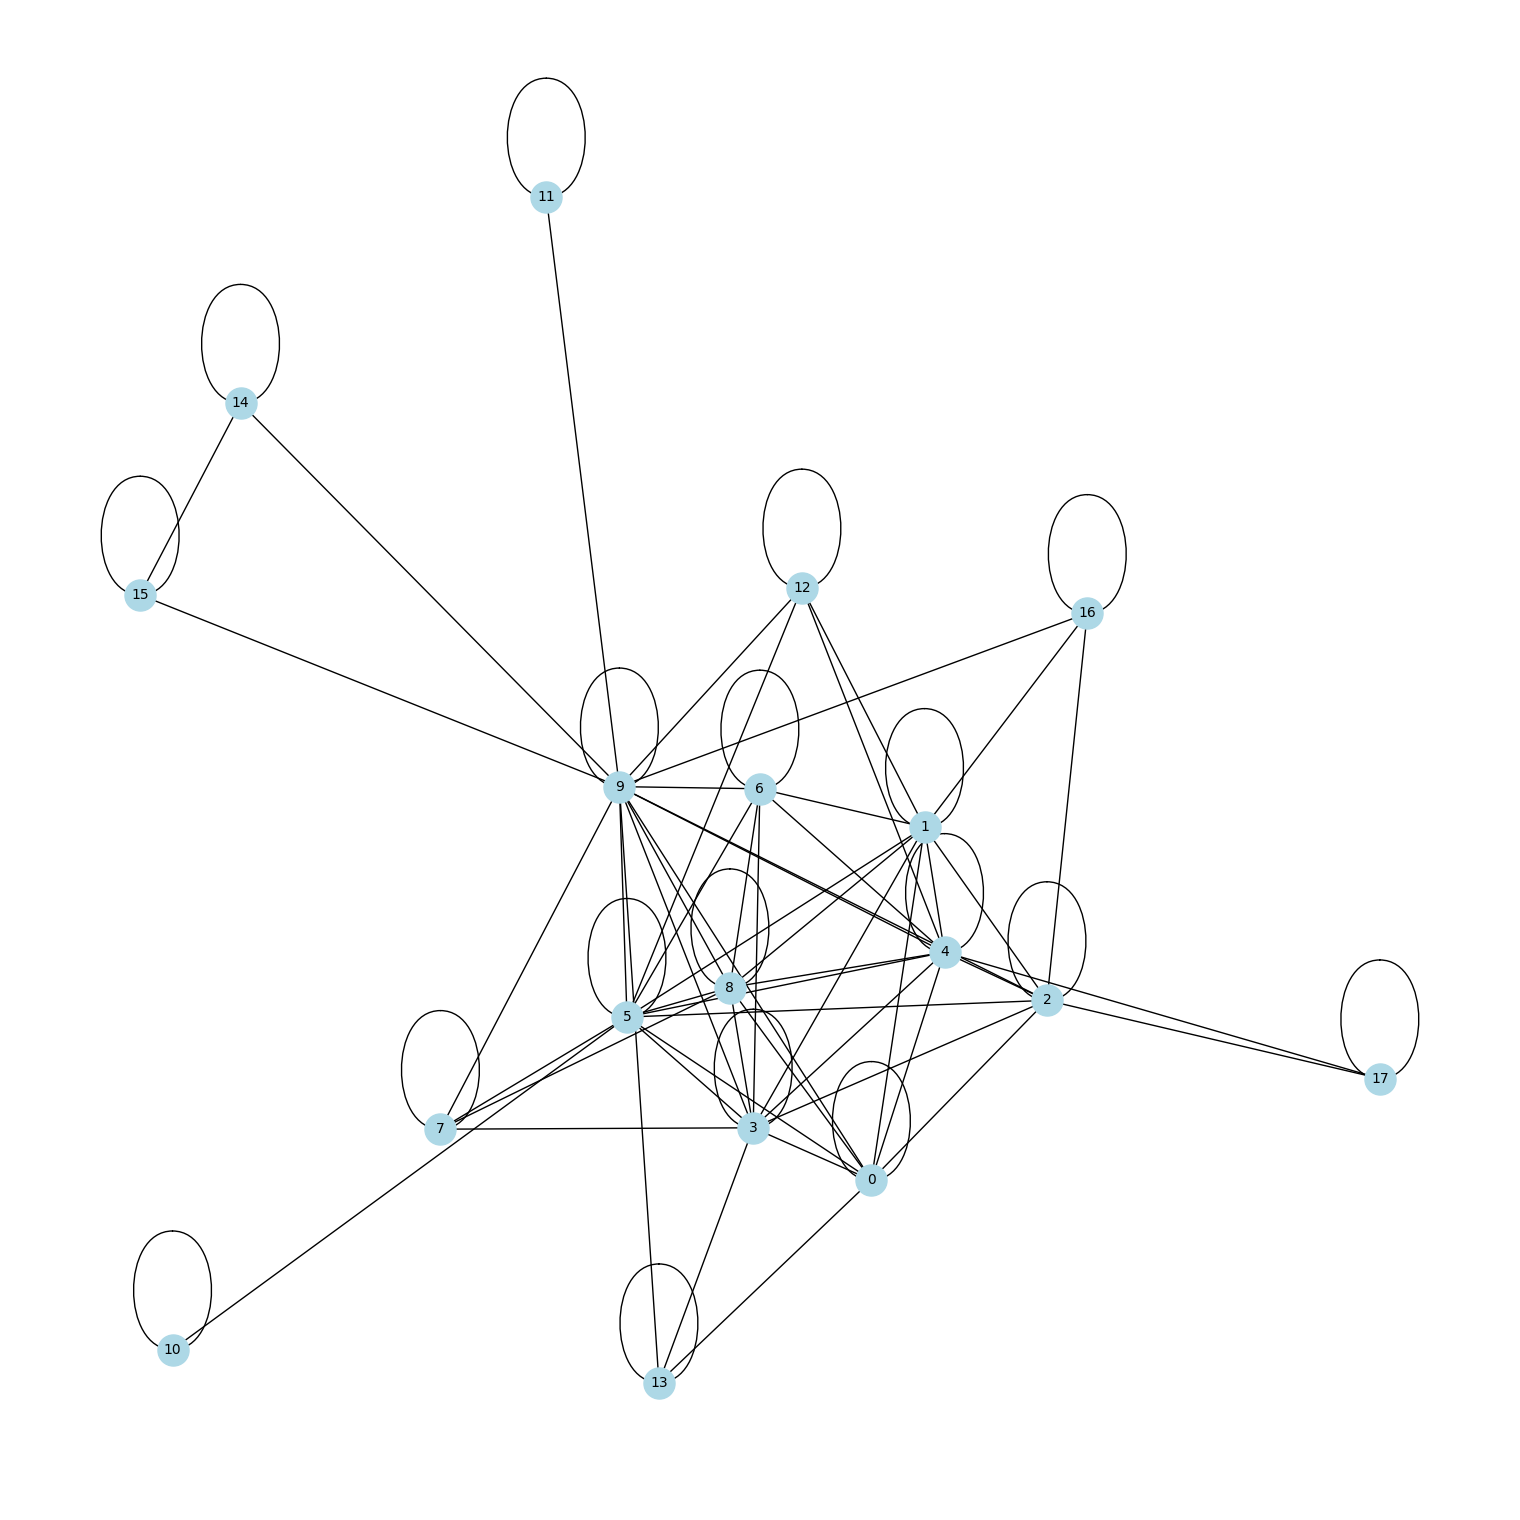

In [458]:
#Este es el grafo de lineas de metro con sus correspondencias.

from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

grafo_lineas = defaultdict(set)

for linea in range(len(todas)):
    for parada in todas[linea]:
        for linea_2 in range(len(todas)):
            if parada in todas[linea] and parada in todas[linea_2]:
                grafo_lineas[linea].add(linea_2)
                grafo_lineas[linea_2].add(linea)

G = nx.Graph()

for nodo, conexiones in grafo_lineas.items():
    for conexion in conexiones:
        G.add_edge(nodo, conexion)


plt.figure(figsize=(15,15))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

plt.show()

In [459]:
grafo_lineas

defaultdict(set,
            {0: {0, 1, 2, 3, 4, 5, 8, 9, 13},
             3: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13},
             13: {0, 3, 9, 13},
             9: {0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16},
             8: {0, 1, 3, 4, 5, 6, 7, 8, 9},
             1: {0, 1, 2, 3, 4, 5, 6, 8, 12, 16},
             5: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12},
             4: {0, 1, 2, 3, 4, 5, 6, 8, 9, 12, 17},
             2: {0, 1, 2, 3, 4, 5, 9, 16, 17},
             12: {1, 4, 5, 9, 12},
             16: {1, 2, 9, 16},
             6: {1, 3, 4, 5, 6, 8, 9},
             17: {2, 4, 17},
             7: {3, 5, 7, 8, 9},
             10: {5, 10},
             14: {9, 14, 15},
             15: {9, 14, 15},
             11: {9, 11}})

Vamos a escribir algunas funciones que nos ayudaran a definir el heuristico descrito.

In [460]:
from itertools import product

def camino_lineas(nodo, objetivo):
    """Esta funcion toma una estacion origen y otra destino y te devuelve el minimo camino posible de lineas para llegar."""
    lineas_inicio = {i_linea for i_linea in range(len(todas)) if nodo in todas[i_linea]}
    lineas_destino = {i_linea for i_linea in range(len(todas)) if objetivo in todas[i_linea]}

    combinaciones = list(product(lineas_inicio, lineas_destino))

    best_sol = []
    
    for l_inicio, l_destino in combinaciones:
        sol = branch_and_bound(l_inicio, l_destino, sucesores_grafo, lambda camino: len(camino) - 1, grafo_lineas)

        if sol == None:
            sol = []
        
        if best_sol == None or len(best_sol) > len(sol):
            best_sol = sol


    if sol:
        return sol
    else:
        return []


origen = 'Estrecho'
destino = 'Barajas'

print(camino_lineas(origen, destino))

[0, 3, 7]


In [461]:
def get_posibles_lineas(parada):
    """Esta funcion devuelve el identificador de las líneas a las que pertenece una parada y nos ayuda a gestionar casos de intersecciones mas adelante"""
    return {i for i in range(len(todas)) if parada in todas[i]}

In [462]:
print(get_posibles_lineas("Portazgo"))
print(get_posibles_lineas("Tribunal"))

{0}
{0, 9}


In [463]:
def d_min_hasta_interseccion(parada_inicial):
    """Esta función te devuelve la distancia hasta la intersección más cercana desde una parada dada"""

    def is_interseccion(parada):
        contador_lineas = False

        for linea in todas:
            if parada in linea:
                if not contador_lineas:
                    contador_lineas = True
                else:
                    return True
                
        return False
    
    
    min_distance = None
    
    for linea in get_posibles_lineas(parada_inicial):
        i = todas[linea].index(parada_inicial)
        
        if is_interseccion(todas[linea][i]):
            return 0
        
        for j in range(i+1, len(todas[linea])):
            if is_interseccion(todas[linea][j]):
                if min_distance is None or min_distance >  abs(j - i):
                    min_distance = abs(j - i)
                    break

        for k in range(i-1, -1, -1):
            if is_interseccion(todas[linea][k]):
                if min_distance is None or min_distance >  abs(k - i):
                    min_distance = abs(k - i)
                    break

    return min_distance

d_min_hasta_interseccion("Arturo Soria")

3

In [464]:
def is_interseccion(parada):
    #Esta función devuelve True o False en función de si la parada que le pasas es o no una intersección
        contador_lineas = False

        for linea in todas:
            if parada in linea:
                if not contador_lineas:
                    contador_lineas = True
                else:
                    return True
                
        return False


In [465]:
def heuristico_metro (nodo, objetivo):
    """Finalmente tenemos todos los elementos necesarios para poder definir el heuristico que hemos descrito"""

    if interseccion := (get_posibles_lineas(origen) & get_posibles_lineas(destino)):
        h = None
        for parada in todas[list(interseccion)[0]]:
            if parada in [nodo, objetivo]:
                if h == None:
                    h = 0
                else:
                    return h
            if h is not None:
                h += 1
    else:
        return (len(camino_lineas(nodo, objetivo)) - 1) * 6 +\
            d_min_hasta_interseccion(nodo) +\
            d_min_hasta_interseccion(objetivo)
    
    return 0

In [466]:
#Estos Test cases ilustran el funcionamiento

print(heuristico_metro("Sol", "Portazgo"))
print(heuristico_metro("Sol", "Nuevo Mundo"))
print(heuristico_metro("Prado del Rey", 'Alonso de Mendoza'))

9
24
31


In [480]:
def coste_metro (camino):
    coste = 0
    
    for i, parada in enumerate(camino):
        if i == 0:
            #En la primera parada sacamos el conjunto de posibles líneas en als que podemos estar
            posibles_lineas_inicio = get_posibles_lineas(parada)
        elif i == 1:
            #Aquí a calcular la intersección tenemos que el conjunto de posibles líneas tiene la parada en la que estamos efectivamente
            coste += 1
            posibles_lineas = (get_posibles_lineas(parada) & posibles_lineas_inicio)
        else:
            #Con estas medidas anteriores podemos detectar un transbordo intersectando la línea en la que sabemos que estamos con las de la nueva parada
            #de modo que si la intersección es nula hemos cambiado de línea.
            if (get_posibles_lineas(parada) & posibles_lineas):
                coste += 1
            else:
                coste += 5
                #Aquí actualizamos las posibles líneas en caso de transbordo
                posibles_lineas = (get_posibles_lineas(parada) & get_posibles_lineas(camino[i - 1]))

    return coste


origen = 'Pirámides'
destino = "Ríos Rosas"

sol = a_estrella(origen, destino, sucesores_metro, coste_metro, heuristico_metro, model)

''' debe dar
Pirámides
Acacias
Puerta de Toledo
La Latina
Ópera
Callao
Gran Vía
Tribunal
Bilbao
Iglesia
Ríos Rosas
Coste total: 14
Transbordos: 1
'''

print(sol)
print(coste_metro(sol))
print(f"Numero de transordos: {int((coste_metro(sol) - len(sol) + 2) / 5)}")

['Pirámides', 'Acacias', 'Puerta de Toledo', 'La Latina', 'Ópera', 'Callao', 'Gran Vía', 'Tribunal', 'Bilbao', 'Iglesia', 'Ríos Rosas']
14
Numero de transordos: 1


In [488]:
origen = 'Atocha'
destino = "Principe Pío"

sol = a_estrella(origen, destino, sucesores_metro, coste_metro, heuristico_metro, model)

print(sol)
print(coste_metro(sol))
print(f"Numero de transordos: {int((coste_metro(sol) - len(sol) + 2) / 5)}")

['Atocha', 'Atocha Renfe', 'Menéndez Pelayo', 'Pacífico', 'Méndez Álvaro', 'Arganzuela - Planetario', 'Legazpi', 'Usera', 'Plaza Elíptica', 'Opañel', 'Oporto', 'Carpetana', 'Laguna', 'Lucero', 'Alto de Extremadura', 'Puerta del Ángel', 'Principe Pío']
20
Numero de transordos: 1


# Problemas de las vasijas

In [469]:
#Primero implementamos una clase problema que implemente las condiciones del problema, pero sin funcionalidad.

class Problema:
    def __init__(self, c0, c1, objetivo):
        self.c0 = c0
        self.c1 = c1
        self.a0 = 0
        self.a1 = 0
        self.objetivo = objetivo
        self.historial = []

    def __append_historial(self):
        self.historial.append((self.a0, self.a1))

    def llenar(self, i):
        if i == 0:
            self.a0 = self.c0
        else:
            self.a1 = self.c1

        self.__append_historial()
        

    def vaciar(self, i):
        if i == 0:
            self.a0 = 0
        else:
            self.a1 = 0

        self.__append_historial()

    def volcar(self, i):
        if i == 0:
            diferencia = min(self.a0, self.c1 - self.a1)
            self.a0 -= diferencia
            self.a1 += diferencia
        else:
            diferencia = min(self.a1, self.c0 - self.a0)
            self.a1 -= diferencia
            self.a0 += diferencia

        self.__append_historial()

    def __str__(self):
        
        string = ""

        for i, movimiento in enumerate(self.historial):

            string += f"{i + 1}) " + "|" + "#" * movimiento[0] + " " * (self.c0 - movimiento[0]) +"|" + "|" + "#" * movimiento[1] + " " * (self.c1 - movimiento[1]) +"|\n\n" 

        return string

            


In [491]:
#Testeamos y vemos que ya podemos interactuar con el problema

p = Problema(3, 4, 2)
p.llenar(0)
p.volcar(0)
print(p)


1) |###||    |

2) |   ||### |




In [471]:
from copy import deepcopy
from itertools import combinations

class Estado:
    """Cada uno de los nodos de nuestra usqueda la hemos llamado estado, de un estado se puede recuperar tanto coste como sucesores, que seran a su vez Estados"""
    
    def __init__(self, problema: Problema, coste):
        self.problema = problema
        self.coste = coste
    
    def generar_sucesores(self):
        problema_copia_0 = deepcopy(self.problema)
        problema_copia_0.llenar(0)

        problema_copia_1 = deepcopy(self.problema)
        problema_copia_1.llenar(1)

        problema_copia_2 = deepcopy(self.problema)
        problema_copia_2.vaciar(0)

        problema_copia_3 = deepcopy(self.problema)
        problema_copia_3.vaciar(1)

        problema_copia_4 = deepcopy(self.problema)
        problema_copia_4.volcar(0)

        problema_copia_5 = deepcopy(self.problema)
        problema_copia_5.volcar(1)

        return [Estado(problema_copia_0, self.coste + 1),
                Estado(problema_copia_1, self.coste + 1),
                Estado(problema_copia_2, self.coste + 1),
                Estado(problema_copia_3, self.coste + 1),
                Estado(problema_copia_4, self.coste + 1),
                Estado(problema_copia_5, self.coste + 1)]
    
    def is_sol(self):
        return (self.problema.a0 == self.problema.objetivo) or (self.problema.a1 == self.problema.objetivo)

    def __eq__(self, value):
        return self.problema.a0 == value.problema.a0 and self.problema.a1 == value.problema.a1


class Solucion_problema:
    """Después de esta preparacion solamente elegimos en algoritmo ranch and bound para hacer la busqueda en espacios de estado"""
    
    def __init__(self, c0, c1, objetivo):
        self.problema = Problema(c0, c1, objetivo)

    def solucionar(self):

        def poda(estados):
            i_lista_eliminar = set()
            
            combinaciones = combinations([(estado, i) for i, estado in enumerate(estados)], r=2)

            for e1, e2 in combinaciones:
                if e1[0] == e2[0]:
                    if e1[0].coste < e2[0].coste:
                        i_lista_eliminar.add(e2[1])
                    else:
                        i_lista_eliminar.add(e1[1])


            for i in sorted(i_lista_eliminar, reverse=True):
                estados.pop(i)
                        


        estado_inicial = Estado(self.problema, 0)
        estados = [estado_inicial]
        encontrado = False
        resul = None

        while estados and not encontrado:
            estados.sort(key = lambda x: x.coste)
            poda(estados)

            expansiones = estados[0].generar_sucesores()
            
                    
            for expansion in expansiones:
                if expansion.is_sol():
                    encontrado = True
                    resul = expansion
                    break

        
            estados = estados[1:] + expansiones

        
        if resul is not None:
            return resul.problema
        else:
            return None

In [494]:
#Como se puede ver el programa funciona sin problemas.

capacidad_v_1 = 9
capacidad_v_2 = 5
ojetivo = 7

solucion = Solucion_problema(capacidad_v_1, capacidad_v_2, ojetivo)
p_resuelto = solucion.solucionar()
print(p_resuelto)


1) |#########||     |

2) |####     ||#####|

3) |####     ||     |

4) |         ||#### |

5) |#########||#### |

6) |######## ||#####|

7) |######## ||     |

8) |###      ||#####|

9) |###      ||     |

10) |         ||###  |

11) |#########||###  |

12) |#######  ||#####|




### 8-puzzle (opcional)

![SNOWFALL](https://www.researchgate.net/profile/Ruo-Ando/publication/347300656/figure/fig1/AS:969204928901121@1608087870493/Initial-state-and-goal-state-of-8-puzzle_W640.jpg) 

  * Los estados se representarán como listas de listas.
  * La función sucesores, dado un estado, deberá devolver los estados a los que se puede pasar moviendo fichas adyacentes a la casilla vacía.
  * Como coste usar el menor número de pasos.
  * Idea para heurístico: la distancia de la posición actual de cada pieza a la posición q  ue debe ocupar en el objetivo.

In [473]:
objetivo = [[1, 2, 3], [4, 5, 6], [7, 8, 0]] # el 0 re4presenta la casilla vacía

inicio = [[1, 0, 3], [4, 2, 5], [7, 8, 6]] # 3 pasos
#inicio = [[4, 1, 3], [7, 2, 5], [0, 8, 6]] # 6 pasos
#inicio = [[3, 1, 6], [2, 5, 4], [7, 8, 0]] # 14 pasos
#inicio = [[0, 4, 1], [3, 7, 2], [5, 8, 6]] # 18 pasos
#inicio = [[0, 2, 5], [3, 8, 6], [4, 1, 7]] # 22 pasos
#inicio = [[0, 3, 7], [1, 8, 5], [6, 4, 2]] # 22 pasos

De igual manera que hicimos antes en este caso vamos a definir el problema de modo que podemos interactuar con el, e implementamos todos los metodos que nos van a ser útiles.

In [498]:
from copy import deepcopy
from random import choice
from time import sleep

class Tablero():
    def __init__(self, n):

        self.n = n

        matriz = [[f"{i}{j}" for j in range(self.n)] for i in range(self.n)]
        matriz[n - 1][n - 1] = None
        self.matriz = matriz

        self.solved_matriz = deepcopy(matriz)

        self.pos_None = (n-1, n-1)


    def ejecutar_movimiento(self, mov:str):
        assert mov.upper() in ["U", "D", "R", "L"], "el movimiento no es valido"

        match mov.upper():
            case "U":
                target_pos = (self.pos_None[0] + 1, self.pos_None[1])
            case "D":
                target_pos = (self.pos_None[0] - 1, self.pos_None[1])
            case "L":
                target_pos = (self.pos_None[0], self.pos_None[1] + 1)
            case "R":
                target_pos = (self.pos_None[0], self.pos_None[1] - 1)
            case _:
                raise Exception("Algo falla con al procesado del movimiento seleccionado")


        if target_pos[0] in range(self.n) and target_pos[1] in range(self.n):
            self.matriz[target_pos[0]][target_pos[1]], self.matriz[self.pos_None[0]][self.pos_None[1]] = self.matriz[self.pos_None[0]][self.pos_None[1]], self.matriz[target_pos[0]][target_pos[1]]
            self.pos_None = target_pos
        else:
            raise Exception("El movimiento no es valido")

    def ejecutar_secuencia(self, secuencia:list, do_print = False, errors = "ignore"):

        for elemento in secuencia:
            try:
                self.ejecutar_movimiento(elemento)
                if do_print:
                    sleep(0.4)
                    print(elemento)

                    print(self)
            except:
                match errors:
                    case "ignore":
                        pass
                    case "print":
                        print(f"{elemento} fallo al ejecutar una secuencia de movimientos")


    def deshecer_tablero(self, n_movimiento:int):
        #comprobar que los movimientos sean factibles
        bag = ["U", "D", "R", "L"]
        scramble = []

        for movimiento in range(n_movimiento):
            eleccion = choice(bag)
            scramble.append(eleccion)

        self.ejecutar_secuencia(scramble)

    def movimientos_posibles(self):
        movimientos = []

        if self.pos_None[0] != 0:
            movimientos.append("D")
        if self.pos_None[1] != 0:
            movimientos.append("R")
        if self.pos_None[0] != self.n - 1:
            movimientos.append("U")
        if self.pos_None[1] != self.n - 1:
            movimientos.append("L")

        return movimientos

    def is_solved(self):
        return self.matriz == self.solved_matriz

    def bool_solved(self):
        bool_matrix = [[False for _ in range(self.n)] for _ in range(self.n)]

        for i in range(self.n):
            for j in range(self.n):
                if self.solved_matriz[i][j] == self.matriz[i][j]:
                    bool_matrix[i][j] = True

        return bool_matrix

    def __str__(self):
        representacion = ""

        for i in range(self.n):
            for j in range(self.n):
                if (element := self.matriz[i][j]) == None:
                    representacion += " " * 4
                else:
                    representacion += f"{element:^4}"
            representacion += "\n"

        return representacion

    def __repr__(self):
        return str(self)

En este caso, hemos cambiado el método de resolución: debido a las condiciones del problema, en vez de evaluar movimientos evaluamos "subsecuencias". Primero, buscamos recursivamente la subsecuencia de profundidad *p* más prometedora, y después cambiamos el estado del problema. De este modo, el algoritmo desarrolla secuencias más largas. Además, este tipo de puzles se suelen resolver mediante reducción. En este caso, esto significa resolver primero un borde y reducir un puzle de 3 x 3 a uno de 2 x 2. Adaptamos entonces el heurístico para guiar este comportamiento. Así conseguimos que el algoritmo desarrolle secuencias y siga un método coherente a la hora de la resolución.


In [497]:
class Puzle_8_ia(Tablero):
    def __init__(self):
        super().__init__(3)
        self.secuencia_sol = []

    @property
    def valor_euristico(self):
        #solo premiamos el suproblema 2 x 2 si el resto esta resuelto
        
        resueltas_borde = 0
        resueltas_interior = 0

        for i in range(self.n):
            for j in range(self.n):
                if self.bool_solved()[i][j]:
                    if i == 0 or j == 0:
                        resueltas_borde += 1
                    else:
                        resueltas_interior += 1

        if resueltas_borde == 5:
            return resueltas_interior + resueltas_borde
        else:
            return resueltas_borde



    def resolver_tablero(self, do_print = True):

        secuencia_sol = []
        copia_tablero = deepcopy(self)

        def r_buscar_mejor(tablero, profundidad = 15, secuencia_parcial = (), nivel_profunidad = 0):
            #Este es el algoritmo recursivo que encuentra la mejor susecuencia con la prfundidad deseada y que en caso de empate premia la mas corta.

            dic_contrarios = {
                "U" : "D",
                "D" : "U",
                "L" : "R",
                "R" : "L",
            }

            if nivel_profunidad == profundidad:
                return (secuencia_parcial, tablero.valor_euristico)
            else:
                movimientos_posibles = tablero.movimientos_posibles()

                if secuencia_parcial:
                    movimientos_posibles.remove(dic_contrarios[secuencia_parcial[-1]])

                resultados_recursivos = []

                for movimiento in movimientos_posibles:
                    copia_tablero = deepcopy(tablero)
                    copia_tablero.ejecutar_movimiento(movimiento)

                    resultados_recursivos.append(r_buscar_mejor(copia_tablero, profundidad, secuencia_parcial + (movimiento,), nivel_profunidad + 1))

                maximo_capa_debajo = max(resultados_recursivos, key=lambda x:x[1])

                if maximo_capa_debajo[1] > tablero.valor_euristico:
                    return maximo_capa_debajo
                else:
                    return (secuencia_parcial, tablero.valor_euristico)

        while copia_tablero.is_solved() == False:
            chunk_secuencia, heuristica = r_buscar_mejor(copia_tablero)
            print("Secuencia parcial:")
            print(chunk_secuencia)
            print("Valor del euristico tras aplicar las secuencias parciales")
            print(heuristica)
            copia_tablero.ejecutar_secuencia(chunk_secuencia)
            secuencia_sol += list(chunk_secuencia)

        return secuencia_sol

    def demostracion(self):

        self.deshecer_tablero(1000)
        print("Tablero deshecho")
        print(self)

        sol = self.resolver_tablero()
        print("Solucion encontrada: ")
        print(sol)
        self.ejecutar_secuencia(sol, do_print=True)

A continuacion se muestra la informacion de proceso de solucionado la solucion encontrada y una visualizacion paso a paso de la misma.

In [500]:
t = Puzle_8_ia()
t.demostracion()

Tablero deshecho
 11  10     
 00  12  02 
 01  20  21 

Secuencia parcial:
('U', 'R', 'R', 'D', 'L', 'U', 'R', 'U', 'L', 'D', 'R', 'D', 'L', 'U', 'U')
Valor del euristico tras aplicar las secuencias parciales
7
Secuencia parcial:
('D', 'D', 'R', 'U', 'L', 'D', 'R', 'U', 'L', 'D', 'R', 'U', 'L', 'U', 'L')
Valor del euristico tras aplicar las secuencias parciales
9
Solucion encontrada: 
['U', 'R', 'R', 'D', 'L', 'U', 'R', 'U', 'L', 'D', 'R', 'D', 'L', 'U', 'U', 'D', 'D', 'R', 'U', 'L', 'D', 'R', 'U', 'L', 'D', 'R', 'U', 'L', 'U', 'L']
U
 11  10  02 
 00  12     
 01  20  21 

R
 11  10  02 
 00      12 
 01  20  21 

R
 11  10  02 
     00  12 
 01  20  21 

D
     10  02 
 11  00  12 
 01  20  21 

L
 10      02 
 11  00  12 
 01  20  21 

U
 10  00  02 
 11      12 
 01  20  21 

R
 10  00  02 
     11  12 
 01  20  21 

U
 10  00  02 
 01  11  12 
     20  21 

L
 10  00  02 
 01  11  12 
 20      21 

D
 10  00  02 
 01      12 
 20  11  21 

R
 10  00  02 
     01  12 
 20  11  21 

### Actividad opcional

Desarrollar una clase "Busqueda" que unifique dentro todos los algoritmos que hemos implementado en funciones independientes.

Para ello se especificarán en el constructor (__init__) las funciones dependientes del problema, es decir, sucesores, heurístico y coste, y de este modo no habrá que pasarlos como argumento a los algoritmos, sino sólo inicio y objetivo, quedando el código mucho más limpio.

Por ejemplo, el uso de esta clase sería algo así:


In [502]:
class Busqueda:
    def _init_(self, sucesores, grafo, heuristico=None, coste=None):
        """
        Inicializa la clase con el grafo y las funciones de sucesores, heurística y coste.
        
        sucesores: Función que devuelve los sucesores de un nodo.
        grafo: Estructura que representa el grafo.
        heuristico: Función de heurística (opcional).
        coste: Función de coste para calcular el coste del camino (opcional).
        """
        self.sucesores = sucesores
        self.grafo = grafo
        self.heuristico = heuristico
        self.coste = coste
        
    def expandir(self, camino):
        return [camino + [sucesor] for sucesor in self.sucesores(self.grafo, camino[-1]) if sucesor not in camino]

    def profundidad(self, n0, nf):
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            lista_caminos = expansiones + lista_caminos[1:]
        
        return resul

    def amplitud(self, n0, nf):
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            lista_caminos = lista_caminos[1:] + expansiones
        
        return resul

    def escalada(self, n0, nf):
        if self.heuristico is None:
            raise ValueError("Se requiere una función de heurística para el algoritmo de escalada.")
        
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            expansiones.sort(key=lambda x: self.heuristico(x[-1], nf))
            lista_caminos = expansiones + lista_caminos[1:]
        
        return resul

    def primero_el_mejor(self, n0, nf):
        if self.heuristico is None:
            raise ValueError("Se requiere una función de heurística para el algoritmo primero el mejor.")
        
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            lista_caminos = expansiones + lista_caminos[1:]
            lista_caminos.sort(key=lambda x: self.heuristico(x[-1], nf))
        
        return resul

    def poda(self, caminos):
        diccionario = {}
        indices_a_podar = []
        
        for i, camino in enumerate(caminos):
            if not diccionario.get(camino[-1]):
                diccionario[camino[-1]] = (self.coste(camino), i)
            else:
                if self.coste(camino) < diccionario[camino[-1]][0]:
                    indices_a_podar.append(diccionario[camino[-1]][1])
                    diccionario[camino[-1]] = (self.coste(camino), i)
                else:
                    indices_a_podar.append(i)

        for indice in sorted(indices_a_podar, reverse=True):
            caminos.pop(indice)
        
        return caminos

    def branch_and_bound(self, n0, nf):
        if self.coste is None:
            raise ValueError("Se requiere una función de coste para el algoritmo de branch and bound.")
        
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            lista_caminos = expansiones + lista_caminos[1:]
            lista_caminos = self.poda(lista_caminos)
            lista_caminos.sort(key=self.coste)
        
        return resul

    def aestrella(self, n0, nf):
        if self.coste is None or self.heuristico is None:
            raise ValueError("Se requieren funciones de heurística y coste para el algoritmo A*.")
        
        resul = None
        lista_caminos = [[n0]]
        encontrado = False

        while lista_caminos and not encontrado:
            expansiones = self.expandir(lista_caminos[0])
            for expansion in expansiones:
                if expansion[-1] == nf:
                    encontrado = True
                    resul = expansion
                    break
            lista_caminos = expansiones + lista_caminos[1:]
            lista_caminos = self.poda(lista_caminos)
            lista_caminos.sort(key=lambda x: self.coste(x) + self.heuristico(x[-1], nf))
        
        return resul